In [1]:
import tensorflow as tf
import keras 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv("data.csv", header=0, delimiter=",")
dataset.head(20)

,Statement,Sentiment
0,do not get angry or frustrated or desperate or...,4
1,sickening i hurt for florida later for the wha...,4
2,this rainfall is a savage y fall when am in d ...,4
3,angry guy screws his gf in very rude manner po...,4
4,silence is better when you re angry and frustr...,4
5,it s your smile which makes me cool and calm w...,4
6,disappointed w ur new hair policies if ppl can...,4
7,mt drama school audition tip see angry while y...,4
8,go and see this angry by philip ridley absolut...,4
9,NaN,4


In [3]:
print (len(dataset['Sentiment']))
print (len(dataset['Statement']))

43924
43924


In [4]:
Sentiment_words=[]
X_Train_Pos = [] 
Y_Train_Pos = []
X_Train_Neg = []
Y_Train_Neg = []

for row in range (0,dataset['Statement'].count()+1):
    i = dataset['Sentiment'][row]
    if i ==0:
        Sentiment_words.append('neutral')
        X_Train_Pos.append(dataset['Statement'][row])
        Y_Train_Pos.append(dataset['Sentiment'][row])
    elif i == 1:
        Sentiment_words.append('happy')
        X_Train_Pos.append(dataset['Statement'][row])
        Y_Train_Pos.append(dataset['Sentiment'][row])
    elif i == 2:
        Sentiment_words.append('sad')
        X_Train_Neg.append(dataset['Statement'][row])
        Y_Train_Neg.append(dataset['Sentiment'][row])
    elif i == 3:
        Sentiment_words.append('hate')
        X_Train_Neg.append(dataset['Statement'][row])
        Y_Train_Neg.append(dataset['Sentiment'][row])
    elif i == 4:
        Sentiment_words.append('anger')
        X_Train_Neg.append(dataset['Statement'][row])
        Y_Train_Neg.append(dataset['Sentiment'][row])
    else:
        pass
dataset['Sentiment_words'] = Sentiment_words

In [5]:
print(len(Sentiment_words))

43924


In [6]:
print(X_Train_Pos[:20])

['yourself be happy single ladies self date night buying roses is fun until a man comes along to enhance your life i', 'leave footprints of kindness wherever you go paz gratitude blessings happy moving forward awakening changes soul', 'the last 6 weeks have been some of the toughest ones in my life and i m so thankful for my family and friends the', 'many more happy returns of the day nani stay blessed be happy keep going on', 'respond to one of the tweets tagged happy', 'cool fashion for the christian community fashion love motivation happy family motivate htt', 'i decide to be creative today this put a smile on my face and i m happy rubber band happy creativity creative ar', 'sometimes brands try to outsmart competition by doing silly things this google ad by a leading pathology brand', 'happy birthday hb d natural star nani', 'i decide to be creative today this put a smile on my face and i m happy rubber band happy creativity creative', 'after i let you go every single day i am alon

In [7]:
print(len(X_Train_Pos))
print(len(Y_Train_Pos))
print(len(X_Train_Neg))
print(len(Y_Train_Neg))

24930
24930
18994
18994


In [8]:
print (X_Train_Neg)

['do not get angry or frustrated or desperate or enraged or depressed or any such thing you are all e', 'sickening i hurt for florida later for the what if s and i know how they feel no you don t i can t imagin', 'this rainfall is a savage y fall when am in d club n when am home its hot like hell without no light angry', 'angry guy screws his gf in very rude manner portsmouth', 'silence is better when you re angry and frustrated reacting to it will fuel the pain', 'it s your smile which makes me cool and calm when i am sad or angry smile cool calm sad angry edits by birdies yo', 'disappointed w ur new hair policies if ppl cant understand the above below the chin they have issues', 'mt drama school audition tip see angry while you can it is a masterclass in monologue delivery from young actor', 'go and see this angry by philip ridley absolutely brilliant unconventional unexpected and raw', nan, 'i m gonna have to bang some cunt out tonight if he doesn t fuck off tired from work angry we

In [9]:
word_count=pd.value_counts(dataset['Sentiment_words'].values, sort=True)
word_count

happy      15627
sad        15357
neutral     9303
hate        2762
anger        875
dtype: int64

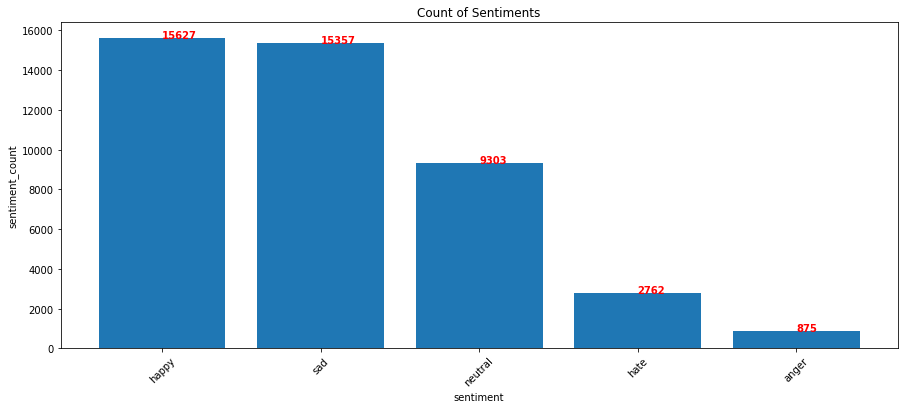

In [10]:
Index = [0,1,2,3,4]
plt.figure(figsize=(15,6))
plt.bar(Index,word_count,color = 'red')
plt.xticks(Index,['happy','sad','neutral','hate','anger'],rotation=45)
plt.ylabel('sentiment_count')
plt.xlabel('sentiment')
plt.title('Count of Sentiments')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='red', fontweight='bold')

In [11]:
X_train=dataset["Statement"]

Y_train=dataset["Sentiment"]

In [12]:
X_train.shape


(43924,)

In [13]:
Y_train.shape


(43924,)

In [14]:
'''
import re
import nltk
import string
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import word_tokenize
from gensim import models
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Dropout, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.callbacks import EarlyStopping
'''

import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from string import punctuation
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.layers import Embedding
from keras.utils.vis_utils import plot_model
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.utils import class_weight
import keras
from keras import backend as K
from keras import utils
from keras.optimizers import Adam

In [15]:
def clean_text(df):
    clean_phrase=[]
    for n in range(len(df)):
        phrases=str(df[n])
        phrases=re.sub('[^a-zA-Z]',' ',phrases).lower().split()
        phrases=[WordNetLemmatizer().lemmatize(phrase) for phrase in phrases if not phrase in stopwords.words('english')]
        use_words=' '.join(phrases)
        clean_phrase.append(use_words)
    return clean_phrase

In [16]:
X_Train_Neg

['do not get angry or frustrated or desperate or enraged or depressed or any such thing you are all e',
 'sickening i hurt for florida later for the what if s and i know how they feel no you don t i can t imagin',
 'this rainfall is a savage y fall when am in d club n when am home its hot like hell without no light angry',
 'angry guy screws his gf in very rude manner portsmouth',
 'silence is better when you re angry and frustrated reacting to it will fuel the pain',
 'it s your smile which makes me cool and calm when i am sad or angry smile cool calm sad angry edits by birdies yo',
 'disappointed w ur new hair policies if ppl cant understand the above below the chin they have issues',
 'mt drama school audition tip see angry while you can it is a masterclass in monologue delivery from young actor',
 'go and see this angry by philip ridley absolutely brilliant unconventional unexpected and raw',
 nan,
 'i m gonna have to bang some cunt out tonight if he doesn t fuck off tired from wor

In [17]:
X_Train_Pos = np.array(X_Train_Pos)
Y_Train_Pos = np.array(Y_Train_Pos)
X_Train_Neg = np.array(X_Train_Neg)
Y_Train_Neg = np.array(Y_Train_Neg)


In [18]:
X_Train_Pos = clean_text (X_Train_Pos)

In [19]:
X_Train_Neg = clean_text (X_Train_Neg)

In [20]:
X_Train_Neg

['get angry frustrated desperate enraged depressed thing e',
 'sickening hurt florida later know feel imagin',
 'rainfall savage fall club n home hot like hell without light angry',
 'angry guy screw gf rude manner portsmouth',
 'silence better angry frustrated reacting fuel pain',
 'smile make cool calm sad angry smile cool calm sad angry edits birdie yo',
 'disappointed w ur new hair policy ppl cant understand chin issue',
 'mt drama school audition tip see angry masterclass monologue delivery young actor',
 'go see angry philip ridley absolutely brilliant unconventional unexpected raw',
 'nan',
 'gonna bang cunt tonight fuck tired work angry see',
 'need start getting angry diet industry bait switch lose weight diet',
 'angry guy screw gf rude manner',
 'billion purple blistering balderdash angry',
 'small success unholy horror weird creepy concept art cone pt design space shooter cowboy angry http http',
 'angry people make mistake rmm fb',
 'angry world publisher turn author stead

In [21]:
from sklearn.model_selection import train_test_split
#Code for TF-IDF
x_train, x_test, y_train, y_test = train_test_split(X_Train_Neg,Y_Train_Neg, test_size=0.1, random_state=6666)

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

max_feature = 500
vectorizer = TfidfVectorizer(max_features=max_feature, min_df=4, max_df=0.8, ngram_range=(1,1))

x_train = vectorizer.fit_transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()

In [22]:
print(x_train.shape)
print(x_test.shape)

(17094, 500)
(1900, 500)


In [23]:
y_train = y_train - 2
y_test = y_test - 2
y_train = utils.to_categorical(y_train, 3)
y_test = utils.to_categorical(y_test, 3)

In [24]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [41]:
model = Sequential(name='NegativeSentimentNN')

model.add(Conv1D(filters=64, kernel_size=3,activation='relu',input_shape=(500,1) , padding='SAME'))
model.add(Conv1D(128, kernel_size=5, activation='relu',padding='SAME'))
model.add(Conv1D(128, kernel_size=5, activation='relu',padding='SAME'))
model.add(MaxPooling1D(pool_size=2 , padding='SAME'))
model.add(Conv1D(128, kernel_size=5, activation='relu',padding='SAME'))
model.add(MaxPooling1D(pool_size=2 , padding='SAME'))
model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
#model.add(Dropout(.2, input_shape=(64,)))
model.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(1e-2)))

In [42]:
model.summary()

Model: "NegativeSentimentNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 500, 64)           256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 500, 128)          41088     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 500, 128)          82048     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 250, 128)          0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 250, 128)          82048     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 125, 128)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)     

In [46]:
optimizer=Adam(lr=5e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
history=model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test,y_test))

Train on 17094 samples, validate on 1900 samples
Epoch 1/10
17094/17094 [==============================] - 61s 4ms/step - loss: 1.2706 - accuracy: 0.8253 - val_loss: 0.9793 - val_accuracy: 0.8447
Epoch 2/10
17094/17094 [==============================] - 79s 5ms/step - loss: 0.8455 - accuracy: 0.8680 - val_loss: 0.7804 - val_accuracy: 0.8726
Epoch 3/10
17094/17094 [==============================] - 79s 5ms/step - loss: 0.6956 - accuracy: 0.8857 - val_loss: 0.6759 - val_accuracy: 0.8768
Epoch 4/10
17094/17094 [==============================] - 79s 5ms/step - loss: 0.6003 - accuracy: 0.8897 - val_loss: 0.6193 - val_accuracy: 0.8768
Epoch 5/10
17094/17094 [==============================] - 79s 5ms/step - loss: 0.5393 - accuracy: 0.8916 - val_loss: 0.5618 - val_accuracy: 0.8779
Epoch 6/10
17094/17094 [==============================] - 79s 5ms/step - loss: 0.4942 - accuracy: 0.8940 - val_loss: 0.5360 - val_accuracy: 0.8774
Epoch 7/10
17094/17094 [==============================] - 79s 5ms/ste

In [48]:
model.save('r3_Neg.h5')

In [49]:

#Evaluate the scores calculated
evaluate = model.evaluate(x_test, y_test, batch_size=128)
print('The testing accuracy is : ',evaluate[1])

1900/1900 [==============================] - 3s 1ms/step
The testing accuracy is :  0.878947377204895


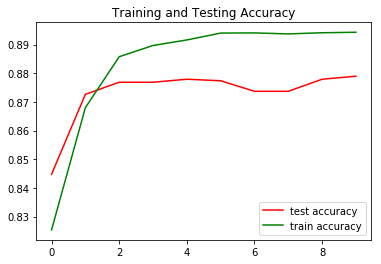

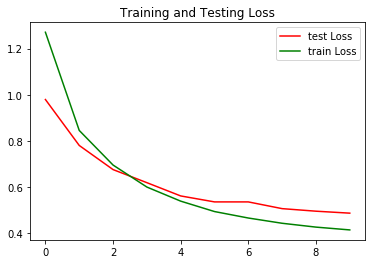

In [55]:
x = range(0,10)
train_loss=history.history['loss']
test_acc=history.history['val_accuracy']
train_acc=history.history['accuracy']
test_loss = history.history['val_loss']
plt.figure()
plt.plot(x, test_acc, 'r')
plt.plot(x, train_acc, 'g')
plt.title('Training and Testing Accuracy')
plt.legend(['test accuracy', 'train accuracy'])
plt.savefig('neg_acc')


plt.figure()
plt.plot(x, test_loss, 'r')
plt.plot(x, train_loss, 'g')
plt.title('Training and Testing Loss')
plt.legend(['test Loss', 'train Loss'])
plt.savefig('neg_loss')
